In [18]:
import math
import random
import time
from matplotlib import pyplot as plt 
from search import *

In [19]:

class Graph:
    def __init__(self):
        self.adj_list = {}

    def add_node(self, node):
        if node not in self.adj_list:
            self.adj_list[node] = {}

    def add_edge(self, src, dest, weight):
        if src not in self.adj_list:
            self.adj_list[src] = {}
        if dest not in self.adj_list:
            self.adj_list[dest] = {}
        self.adj_list[src][dest] = weight
        self.adj_list[dest][src] = weight

    def remove_node(self, node):
        try:
            adjacents = list(self.adj_list[node].keys())
            del self.adj_list[node]
            for neighbor in adjacents:
                del self.adj_list[neighbor][node]
            return f"DELETED {node}"
        except KeyError:
            print("Node not found.")

    def remove_edge(self, src, dest):
        if src in self.adj_list and dest in self.adj_list[src]:
            del self.adj_list[src][dest]
            del self.adj_list[dest][src]
            return f"Deleted edge {dest} from {src}"
        else:
            return False



    def get_neighbors(self, node):
        return self.adj_list.get(node, {})


In [20]:
def load_data(graph, file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if line.strip():
                src, dest, weight = line.strip().split()
                graph.add_edge(src, dest, weight)

graph = Graph()
file_path = "cities_weight_data.txt"
load_data(graph, file_path)

# Adding Nodes and edges
graph.add_node("Addis Ababa")
graph.add_edge("Addis Ababa","Adama",100)
graph.add_edge("Addis Ababa","Holota",120)


In [21]:
print(graph.get_neighbors("Addis Ababa"))

{'Adama': 100, 'Holota': 120}


In [22]:
print(graph.remove_edge("Addis Ababa", "Holota"))

Deleted edge Holota from Addis Ababa


In [23]:
print(graph.get_neighbors("Addis Ababa"))
print(graph.remove_node("Addis Ababa"))

{'Adama': 100}
DELETED Addis Ababa


In [24]:
search = Search()
print(search.dfs(graph,"Drobeta","Bucharest"))
print(search.bfs(graph,"Drobeta","Bucharest"))


['Drobeta', 'Craiova', 'RimnicuVilcea', 'Sibiu', 'Fagaras', 'Bucharest']
['Drobeta', 'Craiova', 'Pitesti', 'Bucharest']
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/usmael/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_21701/3599533432.py", line 4, in <module>
    print(search.ucs(graph,"Drobeta","Bucharest"))
  File "/home/usmael/Desktop/AI/Assignment-one/search.py", line 131, in ucs
TypeError: unsupported operand type(s) for +: 'int' and 'str'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/usmael/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2120, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/usmael/.local/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/usmael/.local/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1326, in struct

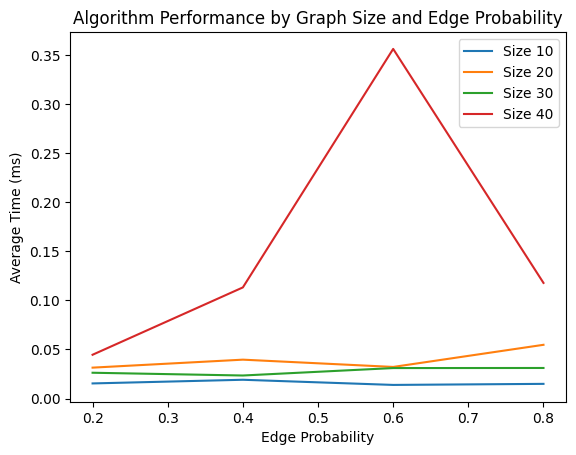

In [ ]:
from collections import defaultdict

def benchmark_algorithms():
    graph_sizes = [10, 20, 30, 40]
    edge_probs = [0.2, 0.4, 0.6, 0.8]
    results = defaultdict(lambda: defaultdict(list))

    for size in graph_sizes:
        for prob in edge_probs:
            graph = RandomGraph(size, prob)
            for _ in range(10):  # Run each experiment 10 times
                start_node = random.choice(list(graph.adjacency_list.keys()))
                goal_node = random.choice(list(graph.adjacency_list.keys()))
                if start_node == goal_node:
                    continue

                # Measure BFS
                start_time = time.time()
                bfs_path = search.bfs(graph, start_node, goal_node)
                bfs_time = (time.time() - start_time) * 1000  # time in milliseconds
                results[size][prob].append((bfs_path, bfs_time))

    # Now plot results
    for size, probs in results.items():
        times = [sum(data[1] for data in times) / len(times) for prob, times in probs.items()]
        plt.plot(edge_probs, times, label=f'Size {size}')
    plt.legend()
    plt.xlabel('Edge Probability')
    plt.ylabel('Average Time (ms)')
    plt.title('Algorithm Performance by Graph Size and Edge Probability')
    plt.show()

benchmark_algorithms()
